# Обзор приложений Android из Google Play
Магазин Google Play Store доступен каждому. Мобильные приложения просты в создании и могут принести немалую прибыль разработчику. В этом проекте будет приведён всесторонний анализ рынка приложений для Android, сравнение более десяти тысяч приложений в Google Play из различных категорий. Будем искать инсайты в данных, чтобы разработать стратегии стимулирования роста и развития. Рассмотрим данные, которые хранятся в двух файлах. Аpps.csv содержит все детали приложений в Google Play. В каталоге представлено 13 черт, которые описывают данное приложение. Файл user_reviews.csv содержит по 100 комментариев для каждого приложения, начиная от самых информативных. Текст в каждой рецензии был предварительно обработан, и к нему были приписаны 3 признака: тональность высказывания (позитивная, негативная или нейтральная), полярность и субъективность оценки.

In [103]:
import pandas as pd 
data = pd.read_csv("apps.csv")
data.sample(3)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7186,8263,MARVEL Avengers Academy,GAME,4.2,304106,NaN,"10,000,000+",Free,0,Teen,Adventure,"August 6, 2018",2.8.2,4.0.3 and up
6971,8036,Oracle CX Cloud Mobile,BUSINESS,4.4,48,54M,"5,000+",Free,0,Everyone,Business,"July 7, 2018",11.13.18.05.07.03,4.4 and up
5513,6526,BN Pro Solid Battery-White,LIBRARIES_AND_DEMO,3.6,7,0.192,"1,000+",Free,0,Everyone,Libraries & Demo,"February 5, 2017",2.3.2,1.6 and up


## 1. Очистка информации
Три характеристики, с которыми мы будем работать наиболее часто, - это установки, размер и цена. Внимательный взгляд на набор данных показывает, что некоторые из этих столбцов требуют очистки данных для работы кода, который будет создан далее. В частности, наличие специальных символов (, $ +) и букв (M k) в столбцах Installs, Size и Price затрудняет их преобразование в числовой тип данных, поэтому необходимо очистить эти символы из датафрейма.

In [104]:
chars = ['+', ',', 'M', '$']
columns = ['Installs', 'Size', 'Price']

for col in columns:
    for char in chars:
        data[col] = data[col].str.replace(char, '')
    data[col] = pd.to_numeric(data[col])
    
data.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 2. Изучение категорий приложений
Для компаний важно, чтобы их приложения быстро и легко находились клиентами в Google Play. Чтобы улучшить общий поисковый опыт, Google ввел концепцию группирования приложений по категориям. Поэтому актуальны вопросы: какая категория имеет самую высокую долю активных приложений на рынке? Доминирует ли на рынке какая-то конкретная категория? Какие категории имеют наименьшее количество приложений?  
В наборе данных присутствует 33 уникальных категории приложений. Семейные, игровые и программные приложения имеют самую высокую распространенность на рынке.

Number of categories =  33


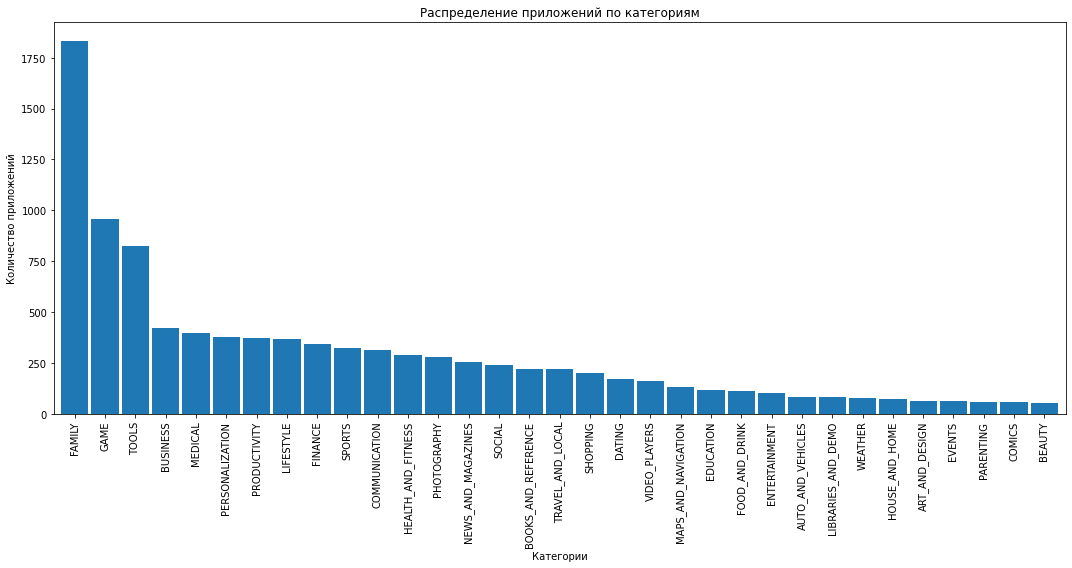

In [45]:
import matplotlib.pyplot as plt

# Число уникальных категорий
num_categories = len(data["Category"].unique())
print('Number of categories = ', num_categories)
# Подчёт количества приложений в каждой категории и сортировка в порядке убывания
num_in_category = data['Category'].value_counts().sort_values(ascending = False)
plt.xlabel('Категории')
plt.ylabel('Количество приложений')
plt.title('Распределение приложений по категориям')
num_in_category.plot(kind='bar', figsize=(15, 8), width = 0.9)

plt.tight_layout()
plt.show()

##  3. Распределение рейтингов приложений
Рейтинги приложений (по шкале от 1 до 5) влияют на открытость, конверсию приложений, а также на имидж бренда. Рейтинги - это ключевой показатель эффективности приложения. Средний объем рейтингов по всем категориям приложений составляет 4,17.  
Данные гистограммы смещены вправо - это означает, что большинство приложений имеют высокую оценку, за исключением нескольких приложений с низким рейтингом.

Средний рейтинг приложений - 4.173


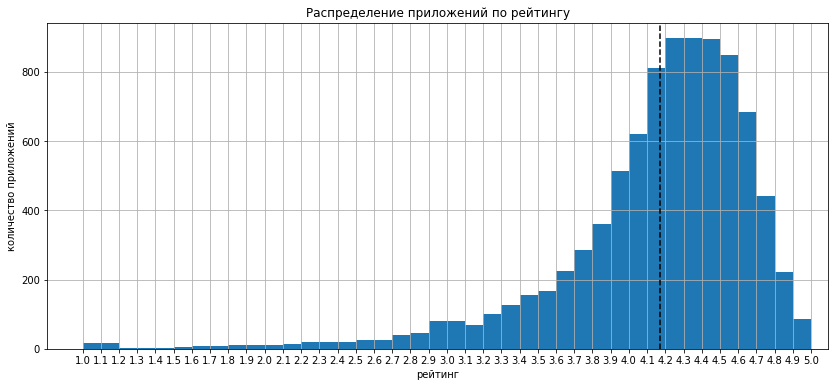

<Figure size 432x288 with 0 Axes>

In [100]:
import numpy as np
avg_rating = data["Rating"].mean() 
print('Средний рейтинг приложений - {:.3f}'.format(avg_rating))
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
# Распределение приложений по их рейтингу
#data1 = [go.Histogram(x = data['Rating'])]
# Вертикальная пунктирная линия для обозначения среднего рейтинга приложения
plt.xlabel('рейтинг')
plt.ylabel('количество приложений')
plt.title('Распределение приложений по рейтингу')
ax.set_xticks(np.arange(1, 5.1, step=0.1))
plt.hist(data['Rating'], bins = np.arange(1, 5, step=0.1), width = 0.2)
plt.grid()
plt.axvline(x = avg_rating, color = 'black', linestyle = '--')
plt.show()


plt.tight_layout()

## 4.  Размер и цена приложения.
Если мобильное приложение слишком велико, длительное время загрузки может оттолкнуть пользователей еще до того, как они познакомятся с ним. Кроме того, устройство каждого пользователя имеет конечное количество дискового пространства. Некоторые пользователи ожидают, что их приложения будут бесплатными или недорогими. Как мы можем эффективно разработать стратегии для определения размера и цены нашего приложения? Влияет ли размер приложения на его рейтинг? Действительно ли пользователи устанавливают много тяжелых приложений, или они предпочитают легкие? Влияет ли цена приложения на его рейтинг? Всегда ли пользователи предпочитают бесплатные приложения платным?  
Данные показывают, что большинство приложений с самым высоким рейтингом (более 4) имеют размер от 2 МБ до 20 МБ, и что подавляющее большинство приложений стоят менее 10 долларов.

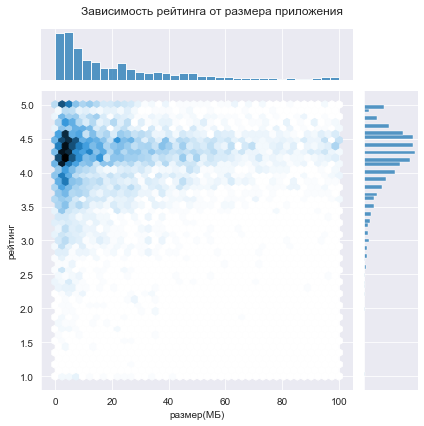

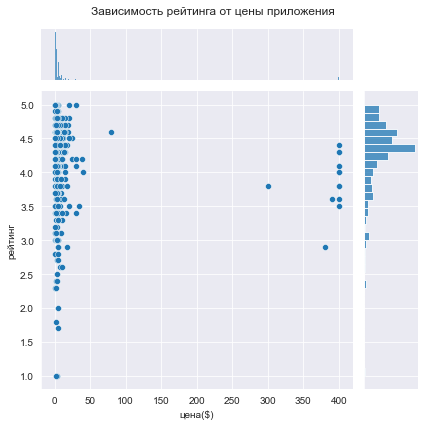

In [91]:
import seaborn as sns
sns.set_style("darkgrid")
# Выделение категорий, включающих в себя более чем 250 приложений

large = data.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()
large.rename(columns = {'Size': 'размер(МБ)', 'Rating': 'рейтинг'}, inplace = True)

plt1 = sns.jointplot(data = large, x = 'размер(МБ)', y = 'рейтинг', kind = 'hex')
plt1.fig.suptitle("Зависимость рейтинга от размера приложения")
plt1.fig.tight_layout()

paid_apps = data[data['Type'] == 'Paid']

paid_apps = paid_apps.rename(columns = {'Price': 'цена($)', 'Rating': 'рейтинг'})

plt2 = sns.jointplot(data = paid_apps, x = 'цена($)', y = 'рейтинг')
plt2.fig.suptitle("Зависимость рейтинга от цены приложения")
plt2.fig.tight_layout()


## 5. Связь между категорией и ценой приложения
Стоимость приложений в значительной степени зависит от особенностей, сложности и платформы.  При выборе правильной ценовой стратегии для вашего мобильного приложения необходимо учитывать множество факторов. Важно учитывать готовность вашего клиента платить за ваше приложение. Неправильная цена может нарушить сделку еще до того, как произойдет загрузка. Слишком высокая стоимость оттолкнёт большиство клиентов, или они могут удалить уже загруженное приложение, не получив того, за что заплатили. Разные категории требуют разных ценовых диапазонов. Некоторые приложения, которые просты и используются ежедневно, такие как калькулятор, вероятно, должны быть бесплатными. Тем не менее, было бы разумно взимать плату за высокоспециализированное медицинское приложение "fora", которое диагностирует пациентов с диабетом. Ниже мы видим, что приложения "MedicalandFamily" являются самыми дорогими. Некоторые медицинские приложения достигают даже 80 долларов! Все игровые приложения имеют разумную цену ниже 20 долларов.

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


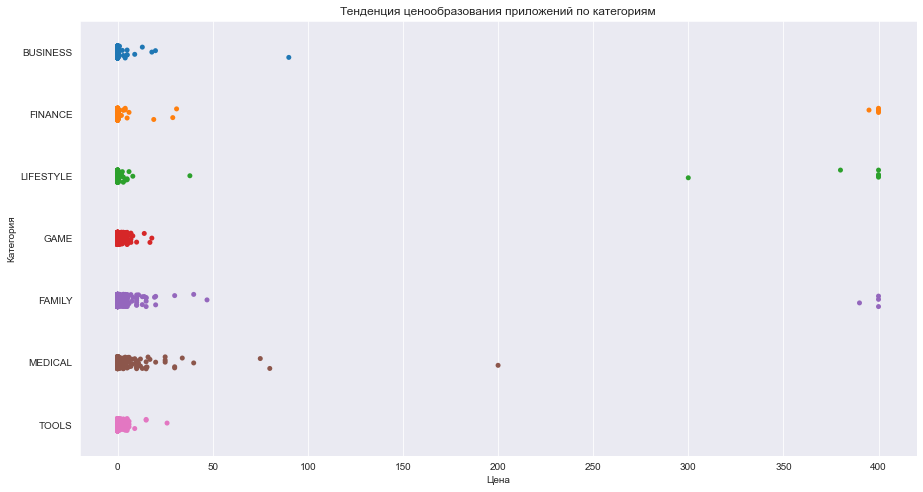

In [99]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
# Выберем несколько популярных категорий
popular_cats = data[data.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPH', 'MEDICAL', 
                                            'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]
# Изучим ценовой тренд с помощью графика зависимости цены от категории
ax = sns.stripplot(x = popular_cats["Price"],
                   y = popular_cats["Category"]).set(title = 'Тенденция ценообразования приложений по категориям',
                                                     xlabel = 'Цена', ylabel = 'Категория')

# Приложения дороже $200
above_200 = popular_cats.loc[popular_cats.Price > 200, ['Category', 'App', 'Price']]
above_200

## 6. Фильтрация бесполезных приложений
Оказывается, большинство действительно дорогих приложений - это "мусорные" приложения, которые на самом деле не имеют цели. Некоторые разработчики могут создать приложение под названием "IAmRichPremium" или "mostexpensiveapp" просто для шутки или для проверки своих навыков разработки приложений. Некоторые разработчики делают это со злым умыслом и пытаются заработать, надеясь, что люди случайно нажмут на их приложение в Google Play Store. Отфильтруем эти ненужные приложения и заново построим визуализацию. 

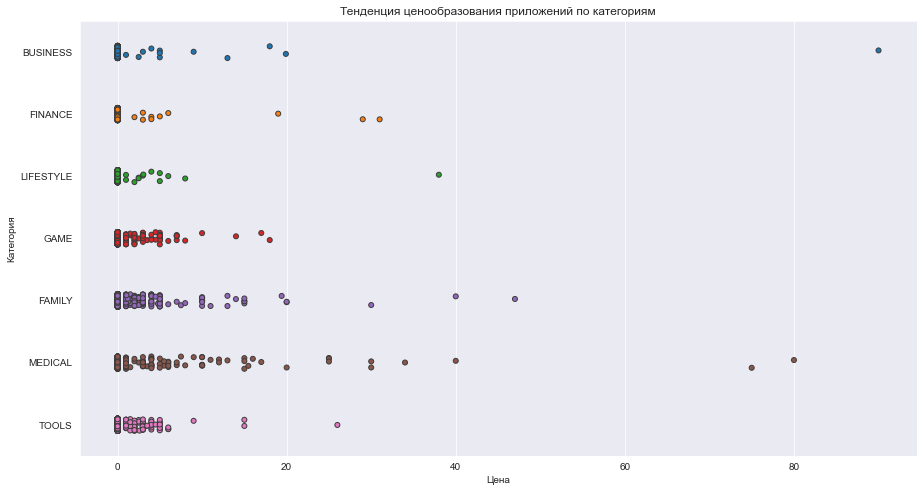

In [28]:
# Выборка приложений с ценой ниже $100
under_100 = popular_cats[popular_cats["Price"] < 100]
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
# График зависимости цены от категории
ax = sns.stripplot(x = "Price", y = "Category", data = under_100, linewidth=1)\
.set(title = 'Тенденция ценообразования приложений по категориям', xlabel = 'Цена', ylabel = 'Категория')

## 7.  Популярность платных приложений по сравнению с бесплатными 
Для приложений в Play Маркет на сегодняшний день существует пять стратегий ценообразования: бесплатные, условно бесплатные, платные, paymium и подписка. Рассмотрим только бесплатные и платные приложения. Основным источником дохода часто является реклама, которая часто создается компаниями, имеющими другие продукты, и приложение служит продолжением этих продуктов. Также она может служить инструментом для удержания, коммуникации и обслуживания клиентов. Некоторые характеристики платных приложений таковы: пользователям предлагается заплатить один раз за то, чтобы приложение было загружено и использовано. Пользователь не может по-настоящему почувствовать приложение, прежде чем купить его. Устанавливаются ли платные приложения так же часто, как и бесплатные? Платные приложения имеют относительно меньшее количество установок, чем бесплатные, хотя разница не очень велика.

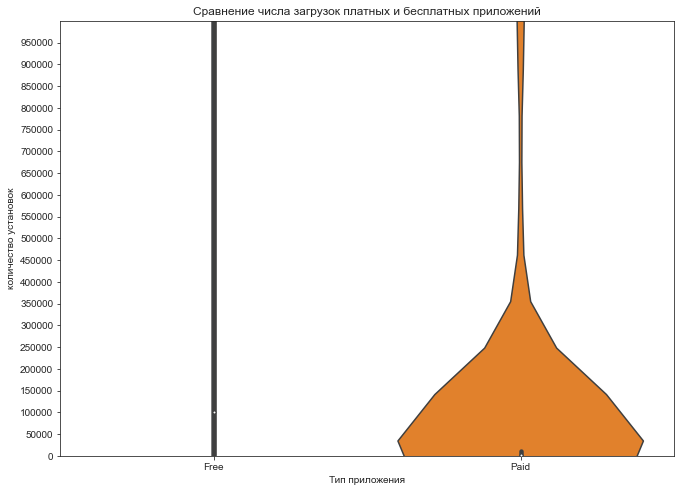

In [120]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.set_style('ticks')
ax.set(ylim=(0, 1000000))
ax.set_yticks(np.arange(0, 1000000, step=50000))
data1 = data.dropna(subset=['Installs', 'Type'])
# Число установок платных и бесплатных приложений
ax = sns.violinplot(data = data1, x = 'Type', y = 'Installs')\
.set(title = 'Сравнение числа загрузок платных и бесплатных приложений', xlabel = 'Тип приложения', ylabel = 'количество установок')

## 8. Анализ настроений отзывов пользователей
Отзывы пользователей о приложениях можно проанализировать, чтобы определить, является ли настроение позитивным, негативным или нейтральным по отношению к этому приложению. Например, положительные отзывы в обзоре приложения могут включать такие слова, как "удивительный", "дружелюбный", "хороший", "отличный" и "любовь". Отрицательные отзывы могут содержать такие слова, как "вредоносное ПО", "ненависть", "проблема", "возврат денег" и "некомпетентность". Построив полярность настроений в оценках отзывов пользователей платных и бесплатных приложений, наблюдаем, что freeapps получают много резких комментариев, о чем свидетельствуют выбросы на отрицательной оси Y. Отзывы о платных приложениях никогда не бывают крайне негативными. Отсюда следует, что качество платных приложений в среднем выше, чем бесплатных. Показатель средней полярности для платных приложений немного выше, чем для бесплатных, что позволяет синхронизировать его с предыдущим наблюдением.

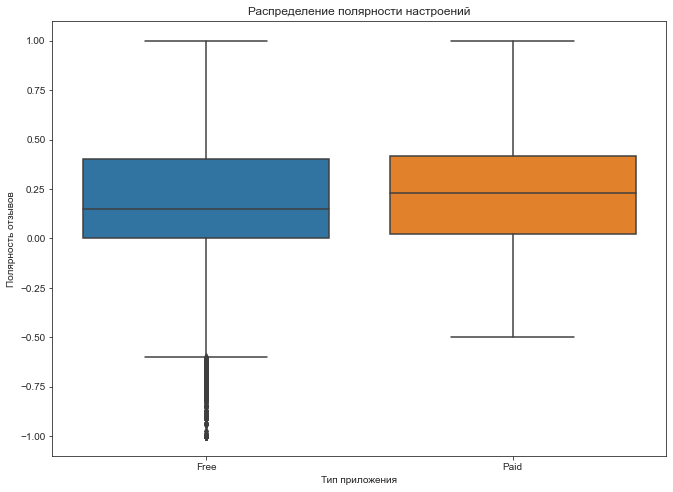

In [101]:
reviews = pd.read_csv("user_reviews.csv")
merged = pd.merge(data, reviews, on = "App", how = "inner")
merged = merged.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
# Полярность отзывов пользователей платных и бесплатных приложений
ax = sns.boxplot(x = "Type", y = "Sentiment_Polarity", data = merged)\
.set(title = 'Распределение полярности настроений', xlabel = 'Тип приложения', ylabel = 'Полярность отзывов')